# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
# Importing necessary packages & modules
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [2]:
#make sure you are loading atleast 50k datapoints
#you can work with features of preprocessed_data.csv for the assignment.
# If you want to add more features, you can add. (This is purely optional, not mandatory)

import pandas
df = pandas.read_csv('preprocessed_data.csv',nrows=50000)# reading the csv file with 50000 data points

In [3]:
# to have a look at the dataset
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
print("Shape of the dataset: ",df.shape)

Shape of the dataset:  (50000, 9)


In [5]:
x = df['project_is_approved'].value_counts()
print(x)
print(x[1]*100/x.sum(),"%")

1    41993
0     8007
Name: project_is_approved, dtype: int64
83.986 %


#### The dataset contains data of projects with 83.9% approvals

In [6]:
# To display crosstabualtion across different categorical features and project approvals
print(pandas.crosstab(df['project_is_approved'],df['school_state']))
print("--"*50)
print(pandas.crosstab(df['project_is_approved'],df['teacher_prefix']))
print("--"*50)
print(pandas.crosstab(df['project_is_approved'],df['project_grade_category']))

school_state          ak   al   ar   az    ca   co   ct   dc   de    fl  ...  \
project_is_approved                                                      ...   
0                     31  108   93  181  1110   78   91   43   21   538  ...   
1                    135  603  435  830  6232  398  575  206  167  2518  ...   

school_state          sd   tn    tx   ut   va  vt   wa   wi   wv  wy  
project_is_approved                                                   
0                     20  123   729  159  146   9  126  136   46   3  
1                    108  702  2860  819  792  36  914  687  218  18  

[2 rows x 51 columns]
----------------------------------------------------------------------------------------------------
teacher_prefix       dr    mr    mrs     ms  teacher
project_is_approved                                 
0                     2   754   4103   2926      222
1                     3  3866  22654  14697      773
-----------------------------------------------------------

* California(ca) has the majority of project approvals and disapprovals
* More than 75% of the projects of teachers with prefix (mr,mrs,ms) has been approved
* more than 50% approvals belong to grades_3-5 and grades_prek_2

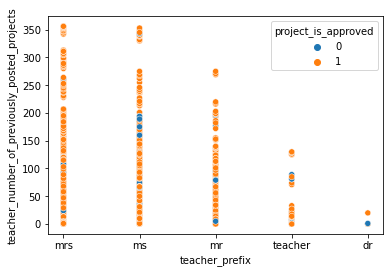

In [7]:
# Plotting using seaborn
sns.scatterplot(df['teacher_prefix'],df['teacher_number_of_previously_posted_projects'],hue=df['project_is_approved'])
plt.show()

* total no. of previously posted projects is high for mrs & ms categories of teacher_prefix feature and
* More than 75% of them are approved 

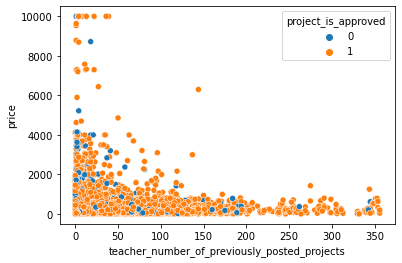

In [8]:
sns.scatterplot(df['teacher_number_of_previously_posted_projects'],df['price'],hue=df['project_is_approved'])
plt.show()

* The plot between no. of previously posted projects and price of the current project follows a power law distribution pattern
* Teachers whose no. of previously posted projects is less are asking for high price for the current project and vice-versa.

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [9]:
# write your code in following steps for task 1
# 1. Split your data.
# 2. Perform Bag of Words Vectorization of text data.
# 3. Perform tfidf vectorization of text data.
# 4. perform one-hot encoding of categorical features.
# 5. perform normalization of numerical features
# 6. For set 1 stack up all the features using hstack()
# 7. For set 2 stack up all the features using hstack()
# 8. Perform hyperparameter tuning and represent the training and cross-validation AUC scores for different 'alpha' values, using a 2D line plot.
# 9. Find the best hyperparameter 'alpha' and fit the model. Plot ROC-AUC curve(by obtaining the probabilities using 'predict proba' method)
# 10. Plot confusion matrix based on the best threshold value
# 11. Either for the model in set 1 or in set 2, print the top 20 features(you have to print the names, not the indexes) associated with the positive and negative classes each.
# 12. Summarize your observations and compare both the models(ie., from set 1 and set 2) in terms of optimal hyperparameter value, train AUC and test AUC scores. 
# 13. You can use Prettytable or any other tabular format for comparison.


# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    

In [10]:
# Split the dataset 
# 1) If you want to apply simple cross-validation, split the dataset into 3 parts (ie., train, CV and test sets)
# 2) If you want to apply K-fold CV (or) GridSearch Cross Validation (or) Randomized Search Cross Validation, just split the dataset into 2 parts (ie., train and test sets)

In [11]:
# defining data beloning to X(features) & Y(target variable) 
Y = df['project_is_approved']
X = df.drop(['project_is_approved','clean_categories','clean_subcategories'],axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
# Splitting the data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,stratify=Y)
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (33500, 6)
X_test shape: (16500, 6)
Y_train shape: (33500,)
Y_test shape: (16500,)


In [13]:
#defining feature sets to list all the features after vectorization
features_set1 = []
features_set2 = []

<h2>1.3 Make Data Model Ready: encoding essay, and project_title</h2>

In [14]:
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Essay' 
# Apply Bag of Words (BOW) vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import CountVectorizer

BOW = CountVectorizer(min_df=10, ngram_range=(1,4),max_features=5000)
# Applying Bag of words vectorization with min. document frequency of 10 and nGram range of (1-4) and max features of 5000
BOW.fit(X_train['essay'].values)
X_train_bow = BOW.transform(X_train['essay'].values)#BOW on train essay
X_test_bow = BOW.transform(X_test['essay'].values)# BOW on test essay
print(X_train_bow.shape)
print(X_test_bow.shape)
features_set1.extend(BOW.get_feature_names())#appending feature names
BOW.get_feature_names()[:20]

(33500, 5000)
(16500, 5000)


['000',
 '10',
 '100',
 '100 free',
 '100 percent',
 '100 students',
 '100 students receive',
 '100 students receive free',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1st',
 '1st grade',
 '20']

In [15]:
# Apply TF-IDF vectorization on 'Preprocessed_Essay' 
# Apply TF-IDF vectorization on 'Preprocessed_Title' (Optional)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1,4),max_features=5000)
# Applying Tfidf vectorization with min. document frequency of 10 and nGram range of (1-4) and max features of 5000
tfidf.fit(X_train['essay'].values)
X_train_tfidf = tfidf.transform(X_train['essay'].values)#Tfidf on train essay
X_test_tfidf = tfidf.transform(X_test['essay'].values)# Tfidf on test essay
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
features_set2.extend(tfidf.get_feature_names())#appending feature names
tfidf.get_feature_names()[:20]

(33500, 5000)
(16500, 5000)


['000',
 '10',
 '100',
 '100 free',
 '100 percent',
 '100 students',
 '100 students receive',
 '100 students receive free',
 '11',
 '12',
 '12th',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '1st',
 '1st grade',
 '20']

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [16]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().
BOW = CountVectorizer()
# Bag of words on categorical features
BOW.fit(X_train['school_state'].values)
X_train_bow_st = BOW.transform(X_train['school_state'].values)# BOW on train School state
X_test_bow_st = BOW.transform(X_test['school_state'].values)# BOW on test School state
print(X_train_bow_st.shape)
print(X_test_bow_st.shape)
features_set1.extend(BOW.get_feature_names())#appending feature names

(33500, 51)
(16500, 51)


In [17]:
BOW = CountVectorizer()
BOW.fit(X_train['teacher_prefix'].values)
X_train_bow_pr = BOW.transform(X_train['teacher_prefix'].values)# BOW on train teacher prefix
X_test_bow_pr = BOW.transform(X_test['teacher_prefix'].values)# BOW on test teacher prefix
print(X_train_bow_pr.shape)
print(X_test_bow_pr.shape)
print(BOW.get_feature_names())
features_set1.extend(BOW.get_feature_names())#appending feature names

(33500, 4)
(16500, 4)
['mr', 'mrs', 'ms', 'teacher']


In [18]:
BOW = CountVectorizer()
BOW.fit(X_train['project_grade_category'].values)
X_train_bow_pc = BOW.transform(X_train['project_grade_category'].values)#BOW on project grade category of train data
X_test_bow_pc = BOW.transform(X_test['project_grade_category'].values)#BOW on project grade category of test data
print(X_train_bow_pc.shape)
print(X_test_bow_pc.shape)
print(BOW.get_feature_names())
features_set1.extend(BOW.get_feature_names())#appending feature names

(33500, 4)
(16500, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [19]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
# Normalizing the price column
norm.fit(X_train['price'].values.reshape(-1,1))

X_train_price = norm.transform(X_train['price'].values.reshape(-1,1))
X_test_price = norm.transform(X_test['price'].values.reshape(-1,1))

print(X_train_price.shape)
print(X_test_price.shape)
features_set1.append('price')#appending feature names

(33500, 1)
(16500, 1)


In [20]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train['school_state'].values)
X_train_tfidf_st = tfidf.transform(X_train['school_state'].values)#Tfidf on train school state
X_test_tfidf_st = tfidf.transform(X_test['school_state'].values)# Tfidf on test school state
print(X_train_tfidf_st.shape)
print(X_test_tfidf_st.shape)
features_set2.extend(tfidf.get_feature_names())#appending feature names

(33500, 51)
(16500, 51)


In [21]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train['teacher_prefix'].values)
X_train_tfidf_pr = tfidf.transform(X_train['teacher_prefix'].values)# Tfidf on train teacher prefix
X_test_tfidf_pr = tfidf.transform(X_test['teacher_prefix'].values)# Tfidf on test teacher prefix
print(X_train_tfidf_pr.shape)
print(X_test_tfidf_pr.shape)
print(tfidf.get_feature_names())
features_set2.extend(tfidf.get_feature_names())#appending feature names

(33500, 4)
(16500, 4)
['mr', 'mrs', 'ms', 'teacher']


In [22]:
tfidf = TfidfVectorizer()
tfidf.fit(X_train['project_grade_category'].values)
X_train_tfidf_pc = tfidf.transform(X_train['project_grade_category'].values)#Tfidf on project grade category of train data
X_test_tfidf_pc = tfidf.transform(X_test['project_grade_category'].values)#Tfidf on project grade category of test data
print(X_train_tfidf_pc.shape)
print(X_test_tfidf_pc.shape)
print(tfidf.get_feature_names())
features_set2.extend(tfidf.get_feature_names())#appending feature names
features_set2.append('price')#appending feature names

(33500, 4)
(16500, 4)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

#### Set 1

In [23]:
from scipy.sparse import hstack
# X train data formation using hstack of BOW vectorized data
x_tr = hstack((X_train_bow,X_train_bow_st,X_train_bow_pr,X_train_bow_pc,X_train_price)).tocsr()
x_ts = hstack((X_test_bow,X_test_bow_st,X_test_bow_pr,X_test_bow_pc,X_test_price)).tocsr()

print("Final Data matrix")
print(x_tr.shape,Y_train.shape)
print(x_ts.shape,Y_test.shape)

Final Data matrix
(33500, 5060) (33500,)
(16500, 5060) (16500,)


In [24]:
#Importing the necessary packages
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve,auc,confusion_matrix

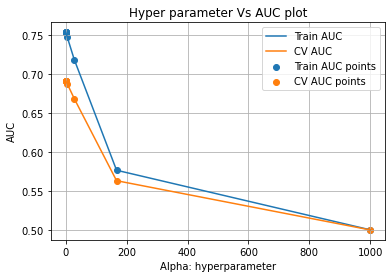

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.123488,0.110503,0.025831,0.014675,0.0001,{'alpha': 0.0001},0.696427,0.687820,0.690701,0.691649,0.003577,1,0.751991,0.758327,0.752102,0.754140,0.002961
1,0.044885,0.008459,0.017614,0.002626,0.000599,{'alpha': 0.0005994842503189409},0.696427,0.687820,0.690700,0.691649,0.003577,2,0.751990,0.758326,0.752101,0.754139,0.002961
2,0.040222,0.001693,0.013965,0.000003,0.003594,{'alpha': 0.003593813663804626},0.696426,0.687819,0.690696,0.691647,0.003578,3,0.751986,0.758322,0.752097,0.754135,0.002961
3,0.043546,0.002050,0.016625,0.001241,0.021544,{'alpha': 0.021544346900318846},0.696420,0.687804,0.690673,0.691633,0.003582,4,0.751960,0.758303,0.752071,0.754111,0.002964
4,0.045212,0.003311,0.015968,0.001400,0.129155,{'alpha': 0.1291549665014884},0.696381,0.687731,0.690537,0.691550,0.003603,5,0.751794,0.758187,0.751929,0.753970,0.002983
5,0.056524,0.014311,0.014962,0.000003,0.774264,{'alpha': 0.774263682681127},0.696159,0.687282,0.689792,0.691077,0.003736,6,0.750837,0.757469,0.751088,0.753131,0.003069
6,0.038894,0.001411,0.015511,0.001539,4.641589,{'alpha': 4.641588833612782},0.694466,0.684417,0.685363,0.688082,0.004531,7,0.745081,0.753104,0.746185,0.748123,0.003550
7,0.039227,0.001881,0.013630,0.000470,27.825594,{'alpha': 27.825594022071257},0.680674,0.665371,0.660684,0.668909,0.008536,8,0.713079,0.725495,0.718507,0.719027,0.005082
8,0.038562,0.000939,0.014994,0.001819,166.810054,{'alpha': 166.81005372000593},0.572991,0.559744,0.557965,0.563567,0.006703,9,0.572706,0.578620,0.579621,0.576982,0.003052
9,0.042599,0.003074,0.013605,0.000958,1000.0,{'alpha': 1000.0},0.500465,0.500346,0.500293,0.500368,0.000072,10,0.500346,0.500632,0.500486,0.500488,0.000117


In [25]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

NB = MultinomialNB(fit_prior = False,class_prior=[0.5,0.5])#defining Naivebayes classifier for crossvalidation
params_NB = {'alpha': np.logspace(-4,3, num=10)}#initializing different values of alpha for CV
clf = GridSearchCV(NB,params_NB,cv=3,scoring='roc_auc',return_train_score = True)#gridsearch cross validation
clf.fit(x_tr,Y_train)

# creating a dataframe using CV results obtained above and sorting them based on alpha
results = pandas.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

# Initializing below colums to varible names
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

#plotting alpha vs. Train auc values
plt.plot(alpha,train_auc,label="Train AUC")
plt.plot(alpha,cv_auc,label="CV AUC")

plt.scatter(alpha,train_auc,label="Train AUC points")
plt.scatter(alpha,cv_auc,label="CV AUC points")
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

### optimal alpha = 0.1

In [26]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.
naiveB = MultinomialNB(alpha=0.1,fit_prior = False,class_prior=[0.5,0.5])#performing naive bayes by using optimal alpha found from above
naiveB.fit(x_tr,Y_train)
# finding /predicting probabilities of y using  train & test dataset
y_train_pred = naiveB.predict_proba(x_tr)[:,1]# using 1 for accessing the probability of prdicting class 1
y_test_pred = naiveB.predict_proba(x_ts)[:,1]

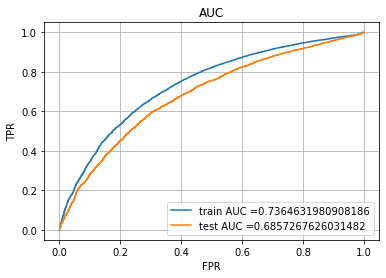

In [27]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

# Plotting ROC-AUC curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

In [28]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
def best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.46389983323315837 for threshold 0.606
Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


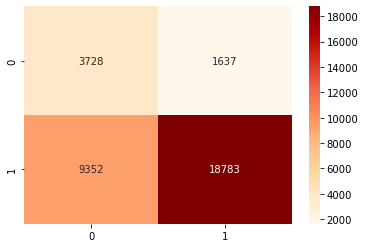

In [29]:
best_thresh = best_threshold(tr_thresholds,train_fpr,train_tpr)
# Confusion matrix for train data
cm_tr=confusion_matrix(Y_train,predict_with_best_t(y_train_pred,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_tr, annot=True,fmt="d",cmap='OrRd'))

* BOW Train accuracy = 68.9%

Confusion Matrix of Test data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


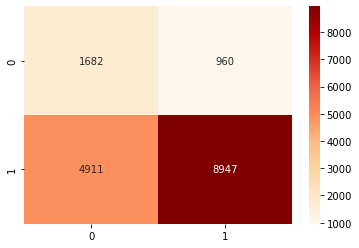

In [30]:
cm_ts=confusion_matrix(Y_test,predict_with_best_t(y_test_pred,best_thresh))
#Confusion matrix for test data
print("Confusion Matrix of Test data: \n",sns.heatmap(cm_ts, annot=True,fmt="d",cmap='OrRd'))

* BOW Test accuracy = 67.5%

In [31]:
#finding the inedx of probabilities of features and sorting them from high to low
neg =np.flip(np.argsort(naiveB.feature_log_prob_[0]))
pos = np.flip(np.argsort(naiveB.feature_log_prob_[1]))

# finding feature names using indexes obtained in above and from feature set
res = []
for i in pos[:20]:
    res.append(features_set1[i])
print('features:\n',res)

features:
 ['students', 'school', 'my', 'classroom', 'learning', 'the', 'not', 'they', 'learn', 'my students', 'help', 'price', 'many', 'nannan', 'work', 'reading', 'we', 'need', 'use', 'able']


* As we can see all the top 20 features belong to the vectorized features of essay column

#### Set 2

In [32]:
# X train data formation using hstack of Tfidf vectorized data
x_tr2 = hstack((X_train_tfidf,X_train_tfidf_st,X_train_tfidf_pr,X_train_tfidf_pc,X_train_price)).tocsr()
x_ts2 = hstack((X_test_tfidf,X_test_tfidf_st,X_test_tfidf_pr,X_test_tfidf_pc,X_test_price)).tocsr()

print("Final Data matrix")
print(x_tr2.shape,Y_train.shape)
print(x_ts2.shape,Y_test.shape)

Final Data matrix
(33500, 5060) (33500,)
(16500, 5060) (16500,)


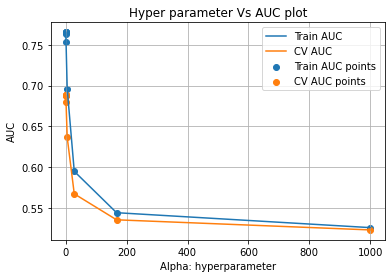

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.043887,0.002155,0.015957,0.000812,0.0001,{'alpha': 0.0001},0.692464,0.683350,0.689123,0.688312,0.003765,1,0.765258,0.768521,0.762511,0.765430,0.002456
1,0.045532,0.000459,0.017291,0.000473,0.000599,{'alpha': 0.0005994842503189409},0.692462,0.683347,0.689116,0.688308,0.003765,2,0.765250,0.768514,0.762504,0.765423,0.002457
2,0.044201,0.002485,0.017957,0.003545,0.003594,{'alpha': 0.003593813663804626},0.692449,0.683313,0.689069,0.688277,0.003771,3,0.765204,0.768476,0.762462,0.765381,0.002458
3,0.042896,0.001645,0.014974,0.000014,0.021544,{'alpha': 0.021544346900318846},0.692361,0.683137,0.688812,0.688103,0.003799,4,0.764921,0.768247,0.762204,0.765124,0.002471
4,0.045876,0.002178,0.021960,0.006457,0.129155,{'alpha': 0.1291549665014884},0.691760,0.682018,0.687231,0.687003,0.003980,5,0.763231,0.766844,0.760674,0.763583,0.002531
5,0.043210,0.002601,0.015638,0.001688,0.774264,{'alpha': 0.774263682681127},0.687084,0.674580,0.677469,0.679711,0.005346,6,0.752338,0.757638,0.750922,0.753632,0.002890
6,0.045891,0.000023,0.016292,0.001703,4.641589,{'alpha': 4.641588833612782},0.650411,0.631390,0.627715,0.636506,0.009946,7,0.690761,0.701219,0.695868,0.695949,0.004270
7,0.045885,0.000802,0.015963,0.001628,27.825594,{'alpha': 27.825594022071257},0.581827,0.564501,0.555599,0.567309,0.010890,8,0.587132,0.598066,0.599473,0.594890,0.005516
8,0.041889,0.001638,0.014615,0.000945,166.810054,{'alpha': 166.81005372000593},0.542035,0.536103,0.528295,0.535478,0.005627,9,0.539943,0.544586,0.548064,0.544198,0.003327
9,0.041242,0.001230,0.017944,0.002800,1000.0,{'alpha': 1000.0},0.526389,0.522537,0.520342,0.523089,0.002499,10,0.523335,0.526749,0.527637,0.525907,0.001855


In [33]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

NB = MultinomialNB(fit_prior = False,class_prior=[0.5,0.5])#defining Naivebayes classifier for crossvalidation
params_NB = {'alpha': np.logspace(-4,3, num=10)}#initializing different values of alpha for CV
clf = GridSearchCV(NB,params_NB,cv=3,scoring='roc_auc',return_train_score = True)#gridsearch cross validation
clf.fit(x_tr2,Y_train)

# creating a dataframe using CV results obtained above and sorting them based on alpha
results = pandas.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

# Initializing below colums to varible names
train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

#plotting alpha vs. Train auc values
plt.plot(alpha,train_auc,label="Train AUC")
plt.plot(alpha,cv_auc,label="CV AUC")

plt.scatter(alpha,train_auc,label="Train AUC points")
plt.scatter(alpha,cv_auc,label="CV AUC points")
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results


In [34]:
# Obtain the optimal value for 'alpha' and using the obtained optimal 'alpha' value, fit a multinomial naive bayes model, on the train data,
# Note: If you have split the datase into 3 parts (ie., train, cv and test sets) in the beginning, then the training datafor this final model would be (train set + cv set)
# Make class label and probability predictions on the train and test data.

naiveB = MultinomialNB(alpha=0.1,fit_prior = False,class_prior=[0.5,0.5])#performing naive bayes by using optimal alpha found from above
naiveB.fit(x_tr2,Y_train)

# finding /predicting probabilities of y using  train & test dataset
y_train_pred = naiveB.predict_proba(x_tr2)[:,1]# using 1 for accessing the probability of prdicting class 1
y_test_pred = naiveB.predict_proba(x_ts2)[:,1]

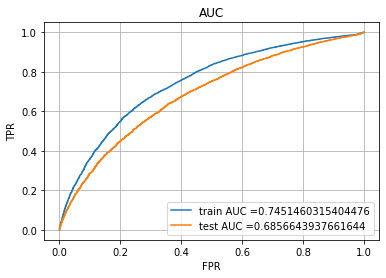

In [35]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)
#Plotting ROC AUC curve
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.47208200509757664 for threshold 0.509
Confusion Matrix of Train data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


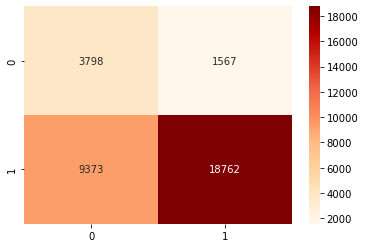

In [36]:
# Pick the best threshold among the probability estimates, such that it has to yield maximum value for TPR*(1-FPR)
# Plot the confusion matrices(each for train and test data) afer encoding the predicted class labels, on the basis of the best threshod probability estimate.
best_thresh = best_threshold(tr_thresholds,train_fpr,train_tpr)
# Confusion matrix for train data
cm_tr=confusion_matrix(Y_train,predict_with_best_t(y_train_pred,best_thresh))
# Using heatmap to display confusion matrix
print("Confusion Matrix of Train data: \n",sns.heatmap(cm_tr, annot=True,fmt="d",cmap='OrRd'))

* Tfidf Train accuracy = 69.4%

Confusion Matrix of Test data: 
 AxesSubplot(0.125,0.125;0.62x0.755)


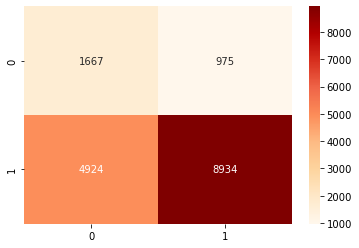

In [37]:
# Confusion matrix for train data
cm_ts=confusion_matrix(Y_test,predict_with_best_t(y_test_pred,best_thresh))
print("Confusion Matrix of Test data: \n",sns.heatmap(cm_ts, annot=True,fmt="d",cmap='OrRd'))

* Tfidf Test accuracy = 67.5%

In [38]:
# Either from set 1 (or) set 2, print the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

#finding the inedx of probabilities of features and sorting them from high to low
neg =np.flip(np.argsort(naiveB.feature_log_prob_[0]))
pos = np.flip(np.argsort(naiveB.feature_log_prob_[1]))
# finding feature names using indexes obtained in above and from feature set
res2 = []
for i in pos[:20]:
    res2.append(features_set2[i])
print('features:\n',res2)

features:
 ['price', 'mrs', 'grades_prek_2', 'ms', 'grades_3_5', 'ca', 'grades_6_8', 'students', 'grades_9_12', 'mr', 'tx', 'ny', 'fl', 'nc', 'school', 'classroom', 'il', 'learning', 'ga', 'my']


* Here the top 20 features contain a mixture of essay words, school city, teacher prefix, project grade category and price

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [39]:
#Summarize your assignment work here in a few points, and also compare the final models (from set 1 and set 2), in terms of optimal hyperparameter value 'alpha', training AUC and test AUC scores.
# You can either use a pretty table or any other tabular structure.
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/
from prettytable import PrettyTable
x = PrettyTable(['Vectorizer','Model','Hyperparameter-Alpha','AUC','Accuracy'])
x.add_rows([
    ['BOW-Train','NaiveBayes',0.1,0.7348,'68.9%'],
    ['BOW-Test','NaiveBayes',0.1,0.6949,'67.5%'],
    ['TFIDF-Train','NaiveBayes',0.1,0.7433,'69.4%'],
    ['TFIDF-Test','NaiveBayes',0.1,0.6933,'67.5%']  
])
print(x)

+-------------+------------+----------------------+--------+----------+
|  Vectorizer |   Model    | Hyperparameter-Alpha |  AUC   | Accuracy |
+-------------+------------+----------------------+--------+----------+
|  BOW-Train  | NaiveBayes |         0.1          | 0.7348 |  68.9%   |
|   BOW-Test  | NaiveBayes |         0.1          | 0.6949 |  67.5%   |
| TFIDF-Train | NaiveBayes |         0.1          | 0.7433 |  69.4%   |
|  TFIDF-Test | NaiveBayes |         0.1          | 0.6933 |  67.5%   |
+-------------+------------+----------------------+--------+----------+


* California(ca) has the majority of project approvals and disapprovals
* More than 75% of the projects of teachers with prefix (mr,mrs,ms) has been approved
* More than 50% approvals belong to grades_3-5 and grades_prek_2
* Total no. of previously posted projects is high for mrs & ms categories of teacher_prefix feature and More than 75% of them are approved
---
* The plot between no. of previously posted projects and price of the current project follows a power law distribution pattern
* Teachers whose no. of previously posted projects is less are asking for high price for the current project and vice-versa.
---
Max probabilties contibuting to classification as class 1(Project Approved label)
* The top 20 features belong to the vectorized features of essay column when BOW is used for Vectorization
* The top 20 features contain a mixture of essay words, school city, teacher prefix, project grade category and price when used Tfidf vectorization